### 작성일 : 19/7/28
### 목적 : 시간의 변동이 fraud ratio에 주는 영향을 파악

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: magrittr


In [2]:
tr <- fread("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
te <- fread("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

### 변수 생성

In [6]:
tr$day <- round(tr$TransactionDT / 60 / 60 /24, 0)
te$day <- round(te$TransactionDT / 60 / 60 /24, 0)

tr$hour <- round(tr$TransactionDT / 60 / 60 , 0) %% 24
te$hour <- round(te$TransactionDT / 60 / 60 , 0) %%24

tr$weekday <- tr$day %% 7
te$weekday <- te$day %% 7

- week, month 등의 변수들을 생성하고 싶으나, 시작 날짜가 정확히 없어서 산출 불가
- day, hour, weekday도 정확한 시간이나 요일을 알수는 없다.

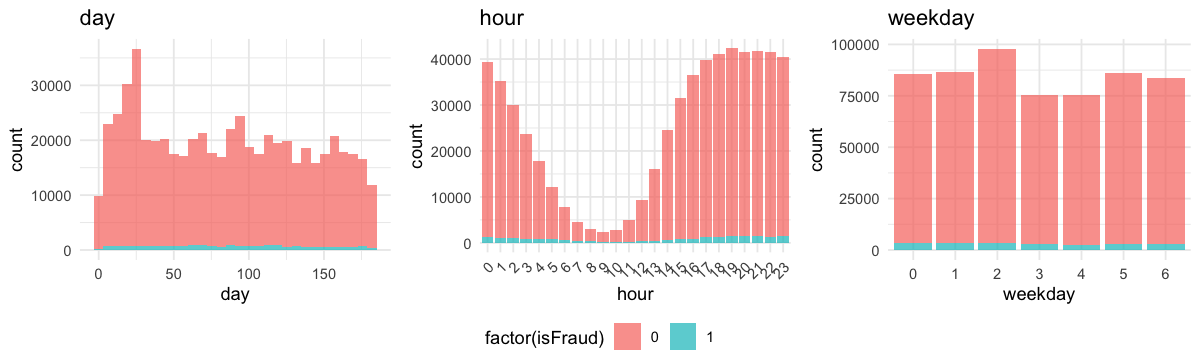

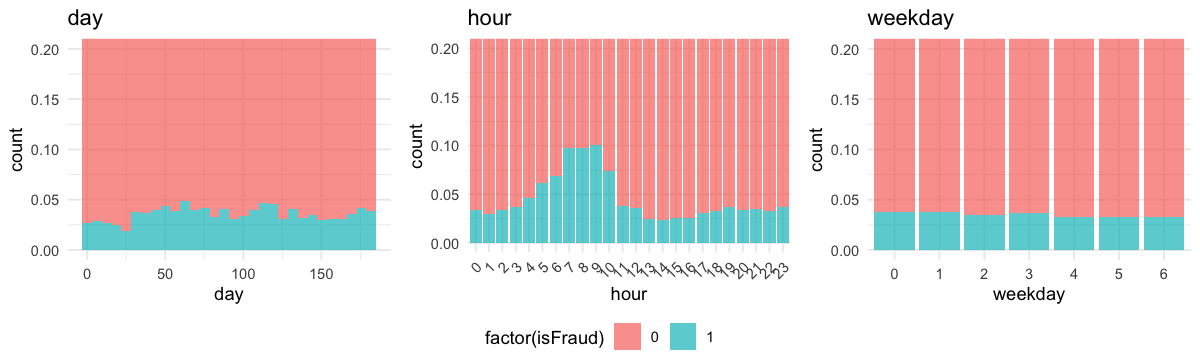

In [11]:
a1  <- ggplot(tr, aes(day, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("day") + labs(x = "day") + theme(legend.position = "bottom")

b1 <- ggplot(tr, aes(factor(hour), fill = factor(isFraud) )) + geom_bar(alpha = 0.7)  + theme_minimal() +
    ggtitle("hour") + labs(x = "hour") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

c1 <- ggplot(tr, aes(factor(weekday), fill = factor(isFraud))) + geom_bar(alpha = 0.7)  + theme_minimal() +
    ggtitle("weekday") + labs(x = "weekday")

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1, c1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 3)
figure

a1  <- ggplot(tr, aes(day, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("day") + labs(x = "day") + theme(legend.position = "bottom")+ coord_cartesian( ylim = c(0, 0.2))

b1 <- ggplot(tr, aes(factor(hour), fill = factor(isFraud) )) + geom_bar(alpha = 0.7, position = 'fill')  + theme_minimal() +
    ggtitle("hour") + labs(x = "hour") + theme(axis.text.x = element_text(angle = 45, hjust = 1))+ coord_cartesian( ylim = c(0, 0.2))

c1 <- ggplot(tr, aes(factor(weekday), fill = factor(isFraud))) + geom_bar(alpha = 0.7, position = 'fill')  + theme_minimal() +
    ggtitle("weekday") + labs(x = "weekday")+ coord_cartesian( ylim = c(0, 0.2))

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure2 <- ggarrange(a1, b1, c1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 3)
figure2


- 101. overall anaylsis에도 발견했듯이 처음 25일 transaction count가 높았으며, 이 경우 fraud ratio는 낮았음
- 시간별 거래량이 적은 시간대에서 fraud ratio가 높아지는 경향
- weekday와의 관계 없음

### top 20 card1 pattern 분석

In [20]:
ex <- tr[, .N, by= 'card1']
ex = ex[order(-N)]
li = ex$card1[1:20]

In [21]:
li[1]

[1] 7919

card1 : 7585 
7585 nrow is  5334

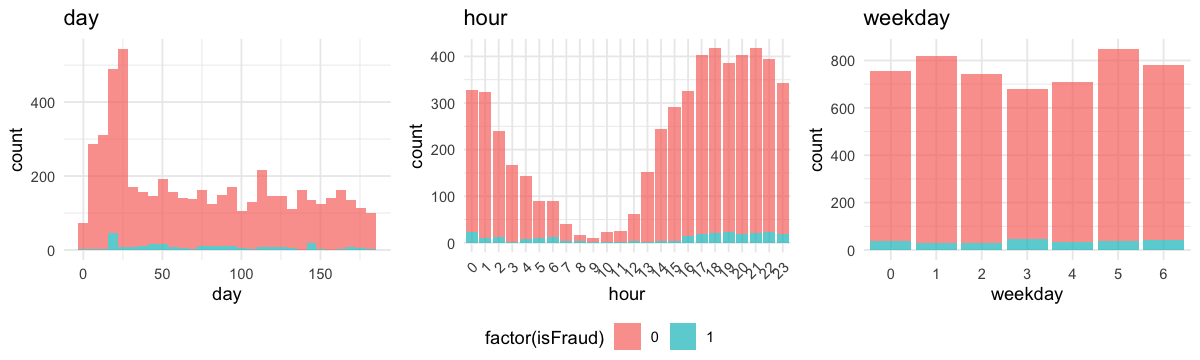

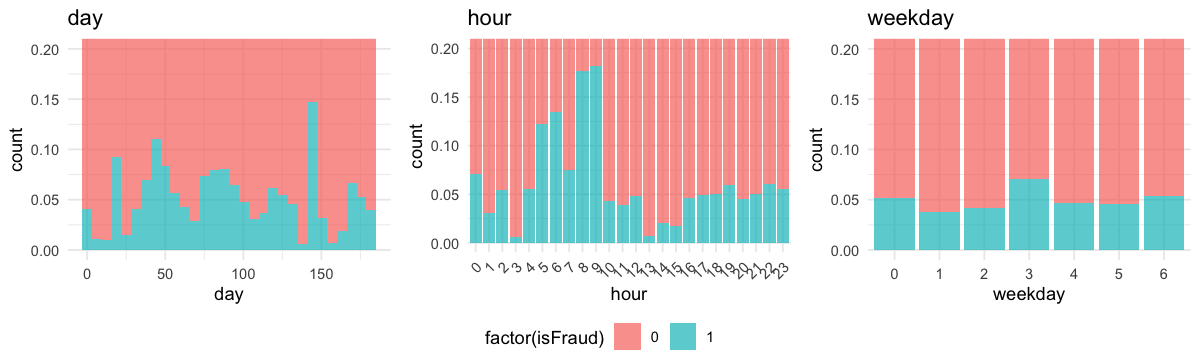

In [38]:
id <- li[10]
cat("card1 :",id, "\n")

ex = tr[card1 %in% id]
cat(id,"nrow is " ,nrow(ex))

a1  <- ggplot(ex, aes(day, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("day") + labs(x = "day") + theme(legend.position = "bottom")

b1 <- ggplot(ex, aes(factor(hour), fill = factor(isFraud) )) + geom_bar(alpha = 0.7)  + theme_minimal() +
    ggtitle("hour") + labs(x = "hour") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

c1 <- ggplot(ex, aes(factor(weekday), fill = factor(isFraud))) + geom_bar(alpha = 0.7)  + theme_minimal() +
    ggtitle("weekday") + labs(x = "weekday")

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1, c1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 3)
figure

a1  <- ggplot(ex, aes(day, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("day") + labs(x = "day") + theme(legend.position = "bottom")+ coord_cartesian( ylim = c(0, 0.2))

b1 <- ggplot(ex, aes(factor(hour), fill = factor(isFraud) )) + geom_bar(alpha = 0.7, position = 'fill')  + theme_minimal() +
    ggtitle("hour") + labs(x = "hour") + theme(axis.text.x = element_text(angle = 45, hjust = 1))+ coord_cartesian( ylim = c(0, 0.2))

c1 <- ggplot(ex, aes(factor(weekday), fill = factor(isFraud))) + geom_bar(alpha = 0.7, position = 'fill')  + theme_minimal() +
    ggtitle("weekday") + labs(x = "weekday")+ coord_cartesian( ylim = c(0, 0.2))

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure2 <- ggarrange(a1, b1, c1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 3)
figure2

In [40]:
ex <- tr[, .(cnt = .N,
            prop = mean(isFraud)), card1]

In [41]:
head(ex)

card1,cnt,prop
<int>,<int>,<dbl>
13926,43,0.232558140
2755,683,0.046852123
4663,1108,0.008122744
18132,4209,0.014017581
4497,18,0.055555556
5937,7,0.000000000


In [50]:
ex2 = ex[cnt>500]
cor.test(ex2$cnt, ex2$prop)


	Pearson's product-moment correlation

data:  ex2$cnt and ex2$prop
t = -0.46943, df = 197, p-value = 0.6393
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1717185  0.1061565
sample estimates:
        cor 
-0.03342695 


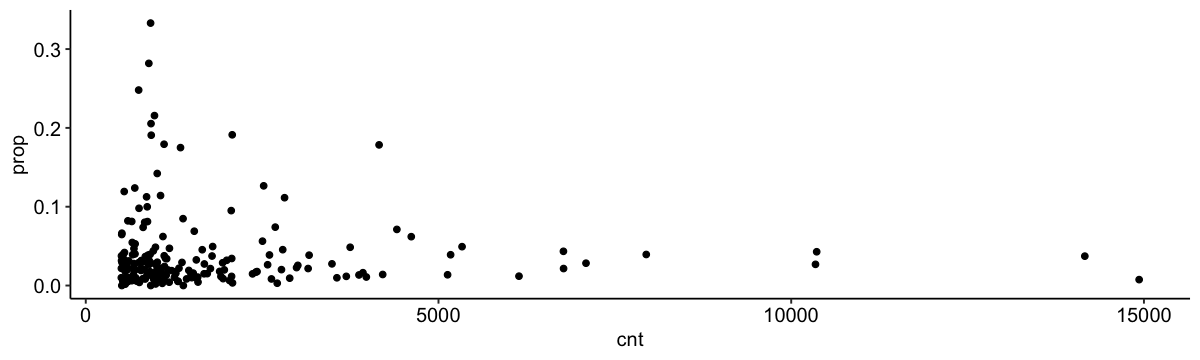

In [51]:
ggplot(ex2, aes(cnt, prop)) + geom_point()

In [52]:
ex <- tr[, .(cnt = .N
            ), card1]

In [53]:
tr <- merge(tr, ex, by= 'card1')

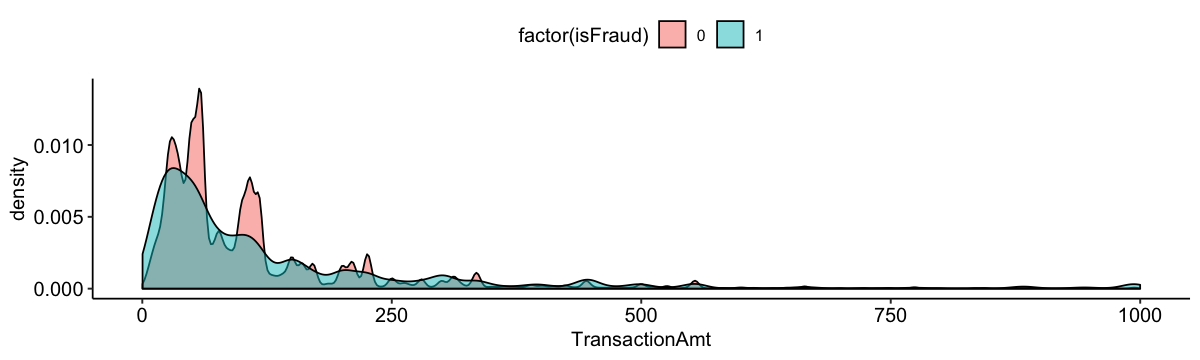

In [58]:
ggplot(tr[TransactionAmt<1000], aes(TransactionAmt, fill= factor(isFraud))) + geom_density(alpha = 0.5)